## Anger times

<p class="aligncenter">
    <img src="https://unrealitymag.com/wp-content/uploads/2012/07/eZb0i.gif" alt="https://unrealitymag.com"
         width = 400/>
</p>

Yet another aplication (or another fit of the exponential distribution) is to analyse how long until someone get angry when this someone is with a person in particular or in particular circumstances. So, say that we start counting at 4:30pm when our focus person meets with person A and we count the minutes till he gets mad (no need to define how this is defined, this is should be understood). This is, they meet daily and we count daily the minutes until the person gets angry saved in the object `angry.times`. Both `dexp` and `pexp` demonstrate the meaning of the exponential function, only that it does not go exponentially forever as the limit of `dexp` is 0, and the limit of `pexp` is 1 (this is, the possibility of having all random values).

<p align="center">
  $${
  \lambda = \frac{1}{\overline{interval}}}$$</p>
<p align="center">

In [4]:
angry.times<-c(
15.00,
30.00,
30.00,
30.00,
15.00,
30.00,
15.00,
75.00,
15.00,
20.00,
10.00,
20.00,
20.00,
15.00,
20.00,
20.00,
30.00,
15.00,
20.00,
25.00,
30.00,
30.00,
80.00,
25.00,
45.00,
45.00,
20.00,
20.00,
25.00,
15.00,
20.00,
15.00,
32.00,
20.00,
15.00,
20.00,
23.00,
50.00,
20.00,
15.00,
15.00,
30.00,
15.00,
10.00,
20.00,
30.00,
20.00,
15.00,
15.00,
30.00,
30.00,
5.00,
15.00,
15.00,
30.00,
10.00,
10.00,
30.00,
15.00,
15.00,
15.00,
15.00,
15.00,
10.00,
15.00,
15.00,
15.00,
15.00,
45.00,
20.00,
10.00,
15.00,
15.00,
15.00,
15.00,
15.00,
20.00,
30.00,
20.00,
20.00,
10.00,
10.00,
10.00,
10.00,
20.00,
22.00,
30.00,
15.00)

In [5]:
#write.csv(angry.times,"anger.times.csv")

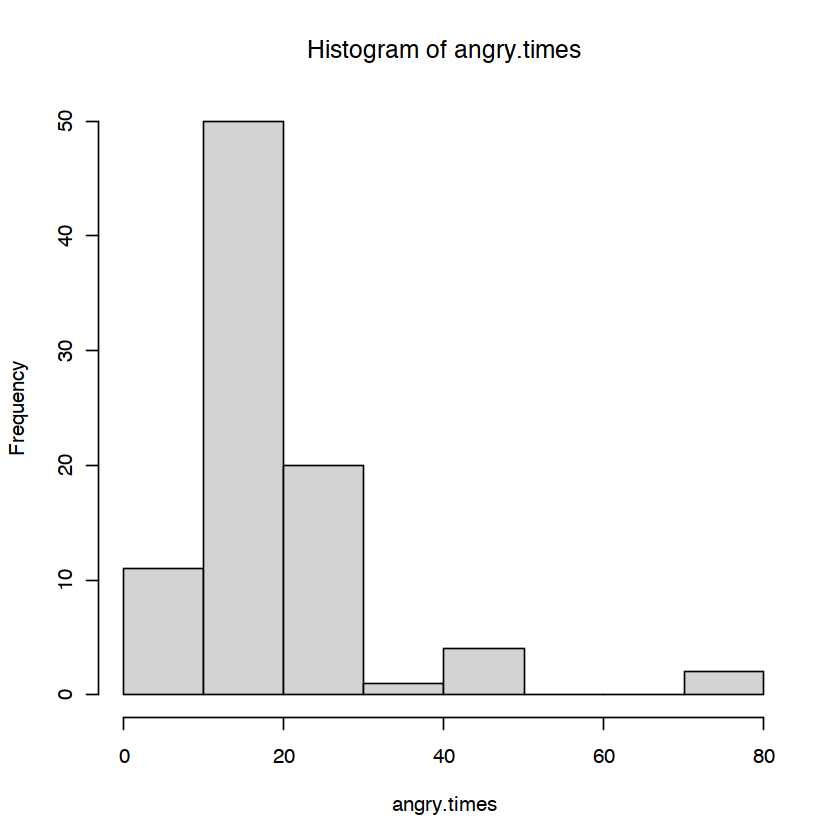

In [6]:
hist(angry.times)

In [9]:
anger.ecdf<-ecdf(angry.times)
summary(anger.ecdf)
anger.ecdf

Empirical CDF:	  13 unique values with summary
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   20.00   25.00   33.23   45.00   80.00 

Empirical CDF 
Call: ecdf(angry.times)
 x[1:13] =      5,     10,     15,  ...,     75,     80

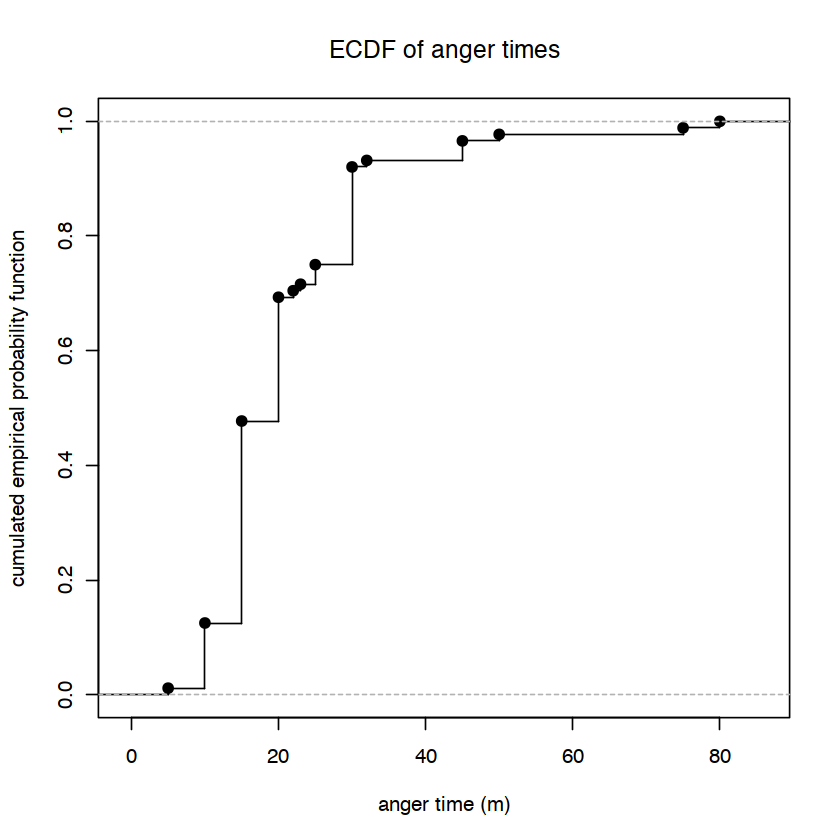

In [11]:
plot(anger.ecdf, xlab = 'anger time (m)',
     main = 'ECDF of anger times',ylab="cumulated empirical probability function",verticals=T)

In [24]:
summary(angry.times)
media<-mean(angry.times)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   15.00   20.00   21.50   26.25   80.00 

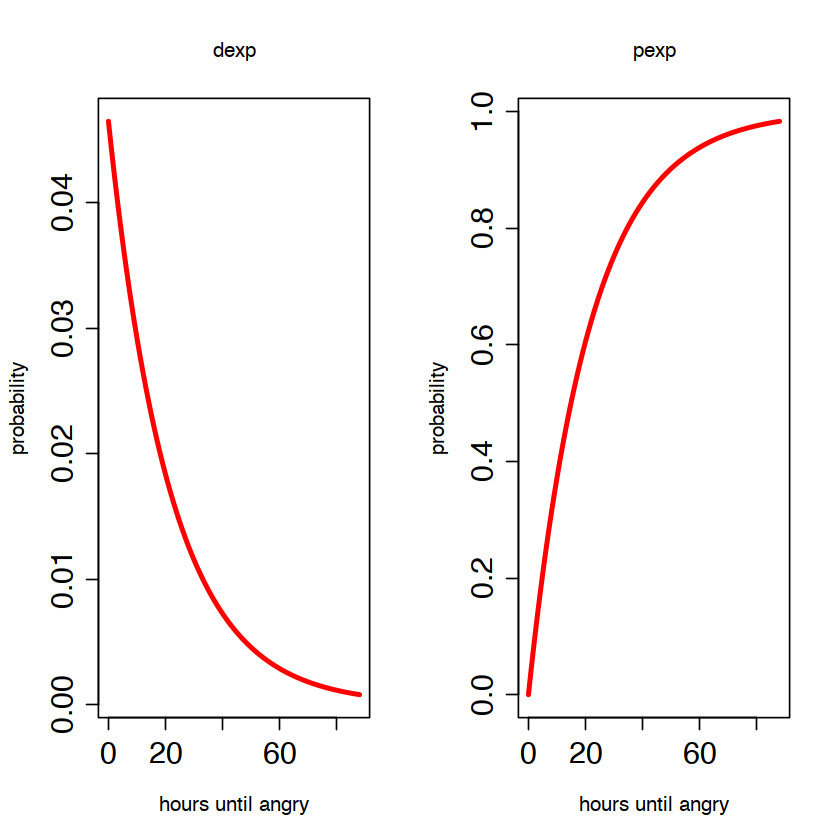

In [45]:
par(mfrow = c(1, 2))
sample <- seq(0, length(angry.times), by = 1)# Specify x-values 
#for exp function
#Now, we can apply the dexp function with a rate of 5 as follows:
prob <- dexp(sample, rate = 1/media)  

plot(sample,prob,main="dexp",
     type="l",lwd=3,col="red",xlab="min until angry",
     ylab="probability",cex.lab=1,cex.axis=1.5,
     cex.main=1)
     
#should it not be the other way around?
#well, the one above looks like histogram or density prob of observed values
#this one is more like cumulated probability
#so yes the cumulater theoretcial probabiliyt approaches empirical probability distribution
sample <- seq(0, length(angry.times), by = 1)# Specify x-values 
#for exp function
#Now, we can apply the dexp function with a rate of 5 as follows:
prob <- pexp(sample, rate = 1/media)  

plot(sample,prob,main="pexp",
     type="l",lwd=3,col="red",xlab="min until angry",
     ylab="probability",cex.lab=1,cex.axis=1.5,
     cex.main=1)

Interpretation:

`dexp(angry.time)` returns the corresponding value of the exponential density for an input minute, however, what puzzles me is that the probability of an exact value must be 0 in theory. The easy answer is that is not the exact probability of any random value, but the probability density for that value, hum, still, it does't let me at ease. This means that most of angry times are accumulated in the first half and hours, thus we could conclude that this person does not have much patience.

`pexp(angry.time)` is the probability that the angry time is less than or equal than a certain value, so yes, this is a similar idea to the empirical probability density function (ECDF), only that the latter is the actual proportion of a value equal or less than a particular minute, whereas the value of `pexp` refers to a cumulated exponential distribution under a particular rate, lambda, in this case `1/mean angry time`. This means that most values occurred below 30 minutes, it must obviously have the same conclusion to dexp since we are seeing the same data from different angles, only plotted in a different way.

Both `dexp` and `pexp` demonstrate the meaning of the exponential function, only that it does not go exponentially forever as the limit of `dexp` is 0, and the limit of `pexp` is 1 (this is, the possibility of having all random values).

<p align="center">
  $${
  \lambda = \frac{1}{\overline{interval}}}$$</p>
<p align="center">

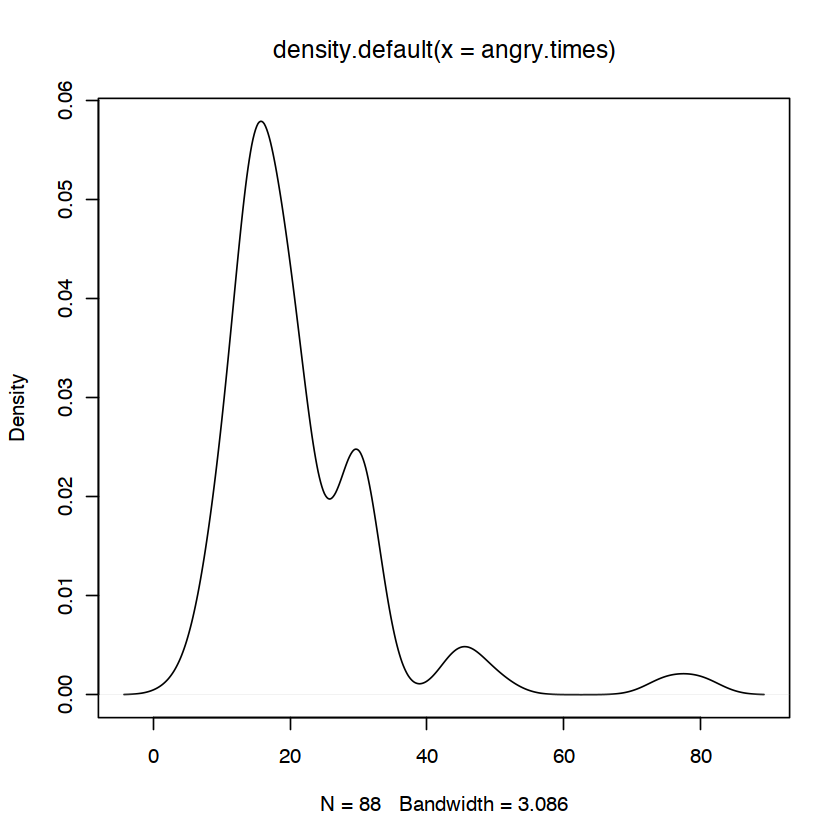

In [62]:
plot(density(angry.times))
#this is the observed density plot, so that it is related to dexp,
#only that here the smoothing parameter is key.

In [50]:
dexp(30,1/media)#the density prob of next day getting angry after 30 minutes
pexp(30,1/media)#the probability of getting angry after 30 min or less. So, it is very likely that a person will
#get angry in the first 30 min

[1] 0.0115231

[1] 0.7522534

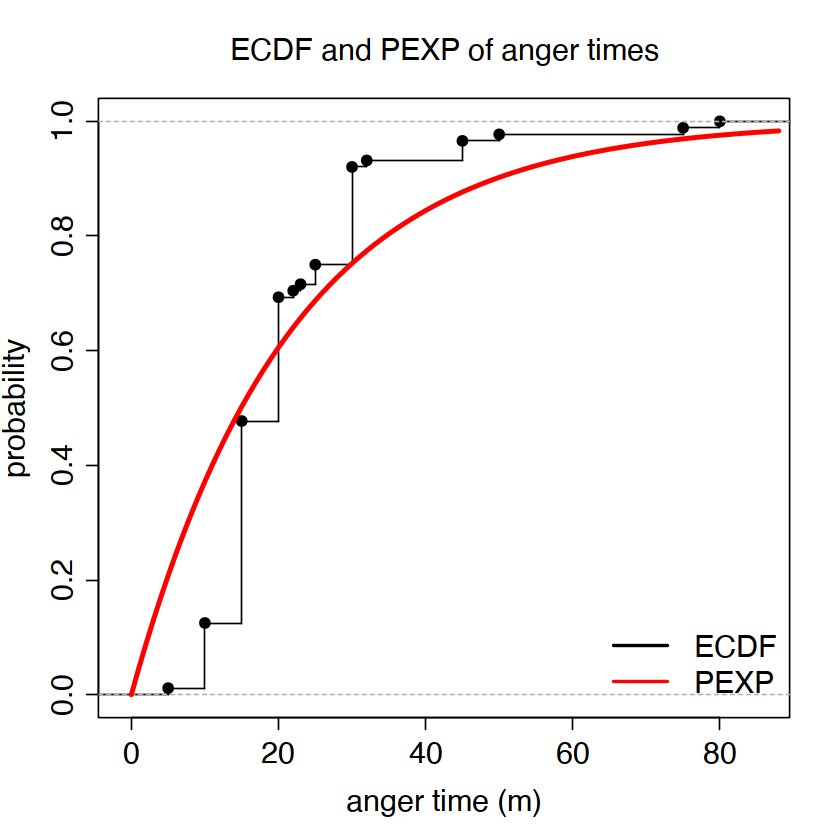

In [48]:
plot(anger.ecdf, xlab = 'anger time (m)',
     main = 'ECDF and PEXP of anger times',ylab="probability",verticals=T,
     cex.lab=1.5,cex.axis=1.5,
     cex.main=1.5)
lines(sample,prob,main="pexp",
     type="l",lwd=3,col="red")
legend("bottomright", c("ECDF", "PEXP"),
       lty = c(1, 1), col = c("black", "red"), box.lty = 0, lwd = 2,cex=1.5)
#aha!!!

Will be possible to have a regression of anger time over getting angry? This is wrongly designed as we do not have 0 values for any minture to have a contrast. The data are not designed to compare before angry and not angry minutes since we only have the time where someone gets angry at a particular time. But for the sake of doing a logistic regression with only yes dependent data...

In [54]:
#let's create the dataframe
angry<-rep(c(1),times=length(angry.times))
angry.df<-data.frame(time=angry.times,angry)

In [55]:
head(angry.df)

,time,angry
,<dbl>,<dbl>
1,15,1
2,30,1
3,30,1
4,30,1
5,15,1
6,30,1


In [56]:
# Logistics Regression
glm.fit <- glm(angry ~ time, data = angry.df, family = binomial)

In [57]:
summary(glm.fit)


Call:
glm(formula = angry ~ time, family = binomial, data = angry.df)

Deviance Residuals: 
      Min         1Q     Median         3Q        Max  
2.409e-06  2.409e-06  2.409e-06  2.409e-06  2.409e-06  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)
(Intercept) 2.657e+01  7.729e+04       0        1
time        1.167e-10  3.131e+03       0        1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 0.0000e+00  on 87  degrees of freedom
Residual deviance: 5.1054e-10  on 86  degrees of freedom
AIC: 4

Number of Fisher Scoring iterations: 25


In [59]:
glm.probs <- predict(glm.fit,type = "response")
glm.probs

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 
 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 
79 80 81 82 83 84 85 86 87 88 
 1  1  1  1  1  1  1  1  1  1

#of course based of the model in which all the minutes are related to anger, for any minute a prob of 1 is predicted.

`geom_smooth()` using formula 'y ~ x'



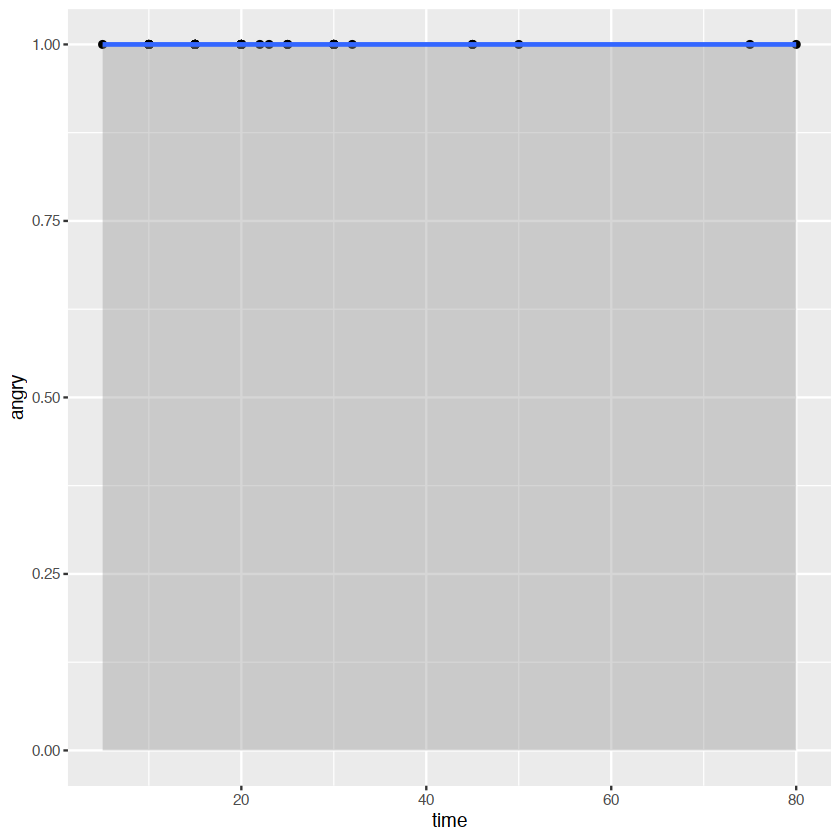

In [61]:
library(ggplot2)
ggplot(angry.df, aes(x=time, y=angry)) +
  geom_point() +
  geom_smooth(method = "glm", 
    method.args = list(family = "binomial"), 
    se = T) 

Let's think of a context in which we could compare angry and non angry times. Well, this should not be done modifying the data since by definition the values are when the person gets angry, it has nothing to do with not getting angry. I mean, if anything, for any day all the minutes before the angry moment where "not-angry", right? Let's say that for every angry moment, 5m earlier were not angry.

In [67]:
#let's create the dataframe2
angry<-rep(c(1),times=length(angry.times))
notangry<-rep(c(0),times=length(angry.times))
angry.df2<-data.frame(time=c(angry.times,angry.times-5),anger=c(angry,notangry))

In [68]:
head(angry.df2)
table(angry.df2$anger)

,time,anger
,<dbl>,<dbl>
1,15,1
2,30,1
3,30,1
4,30,1
5,15,1
6,30,1



 0  1 
88 88 

`geom_smooth()` using formula 'y ~ x'



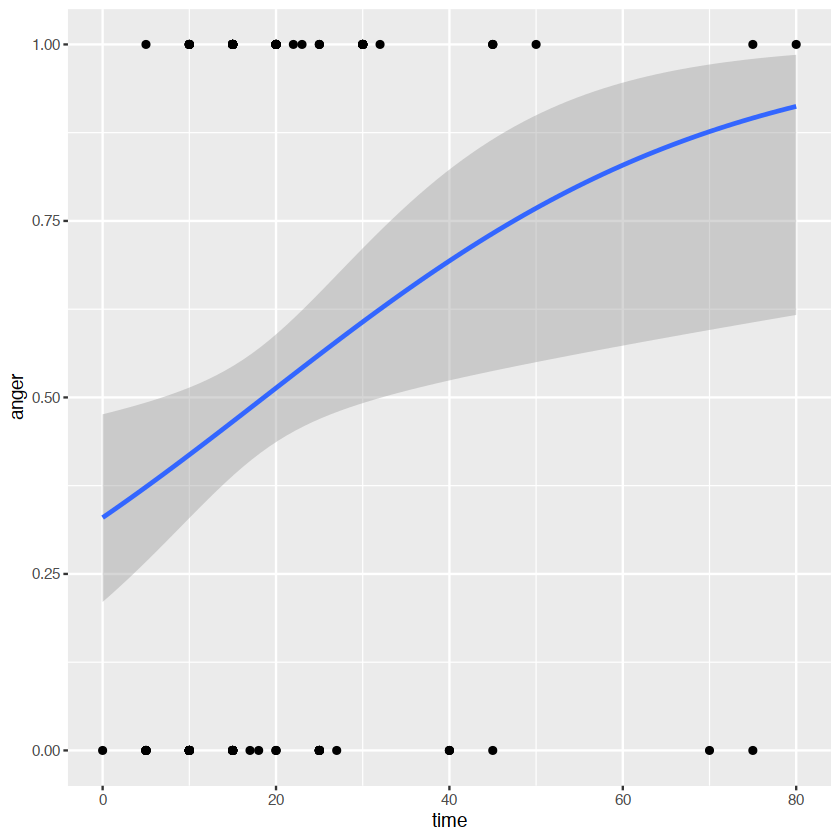

In [70]:
ggplot(angry.df2, aes(x=time, y=anger)) +
  geom_point() +
  geom_smooth(method = "glm", 
    method.args = list(family = "binomial"), 
    se = T) 

In [72]:
# Logistic Regression
glm.fit2 <- glm(anger ~ time, data = angry.df2, family = binomial)
summary(glm.fit2)


Call:
glm(formula = anger ~ time, family = binomial, data = angry.df2)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-2.126  -1.120  -0.233   1.155   1.404  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -0.70920    0.31312  -2.265   0.0235 *
time         0.03813    0.01515   2.518   0.0118 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 243.99  on 175  degrees of freedom
Residual deviance: 236.23  on 174  degrees of freedom
AIC: 240.23

Number of Fisher Scoring iterations: 3


In [73]:
glm.probs2 <- predict(glm.fit2,type = "response")
glm.probs2

1         2         3         4         5         6         7         8 
0.4657527 0.6070172 0.6070172 0.6070172 0.4657527 0.6070172 0.4657527 0.8957413 
        9        10        11        12        13        14        15        16 
0.4657527 0.5133621 0.4187592 0.5133621 0.5133621 0.4657527 0.5133621 0.5133621 
       17        18        19        20        21        22        23        24 
0.6070172 0.4657527 0.5133621 0.5607302 0.6070172 0.6070172 0.9122515 0.5607302 
       25        26        27        28        29        30        31        32 
0.7323907 0.7323907 0.5133621 0.5133621 0.5607302 0.4657527 0.5133621 0.4657527 
       33        34        35        36        37        38        39        40 
0.6250542 0.5133621 0.4657527 0.5133621 0.5418668 0.7680710 0.5133621 0.4657527 
       41        42        43        44        45        46        47        48 
0.4657527 0.6070172 0.4657527 0.4187592 0.5133621 0.6070172 0.5133621 0.4657527 
       49        50        51        52        53        54        55        56 
0.4657527 0.6070172 0.6070172 0.3731951 0.4657527 0.4657527 0.6070172 0.4187592 
       57        58        59        60        61        62        63        64 
0.4187592 0.6070172 0.4657527 0.4657527 0.4657527 0.4657527 0.4657527 0.4187592 
       65        66        67        68        69        70        71        72 
0.4657527 0.4657527 0.4657527 0.4657527 0.7323907 0.5133621 0.4187592 0.4657527 
       73        74        75        76        77        78        79        80 
0.4657527 0.4657527 0.4657527 0.4657527 0.5133621 0.6070172 0.5133621 0.5133621 
       81        82        83        84        85        86        87        88 
0.4187592 0.4187592 0.4187592 0.4187592 0.5133621 0.5323864 0.6070172 0.4657527 
       89        90        91        92        93        94        95        96 
0.4187592 0.5607302 0.5607302 0.5607302 0.4187592 0.5607302 0.4187592 0.8765450 
       97        98        99       100       101       102       103       104 
0.4187592 0.4657527 0.3731951 0.4657527 0.4657527 0.4187592 0.4657527 0.4657527 
      105       106       107       108       109       110       111       112 
0.5607302 0.4187592 0.4657527 0.5133621 0.5607302 0.5607302 0.8957413 0.5133621 
      113       114       115       116       117       118       119       120 
0.6934123 0.6934123 0.4657527 0.4657527 0.5133621 0.4187592 0.4657527 0.4187592 
      121       122       123       124       125       126       127       128 
0.5794198 0.4657527 0.4187592 0.4657527 0.4942990 0.7323907 0.4657527 0.4187592 
      129       130       131       132       133       134       135       136 
0.4187592 0.5607302 0.4187592 0.3731951 0.4657527 0.5607302 0.4657527 0.4187592 
      137       138       139       140       141       142       143       144 
0.4187592 0.5607302 0.5607302 0.3297759 0.4187592 0.4187592 0.5607302 0.3731951 
      145       146       147       148       149       150       151       152 
0.3731951 0.5607302 0.4187592 0.4187592 0.4187592 0.4187592 0.4187592 0.3731951 
      153       154       155       156       157       158       159       160 
0.4187592 0.4187592 0.4187592 0.4187592 0.6934123 0.4657527 0.3731951 0.4187592 
      161       162       163       164       165       166       167       168 
0.4187592 0.4187592 0.4187592 0.4187592 0.4657527 0.5607302 0.4657527 0.4657527 
      169       170       171       172       173       174       175       176 
0.3731951 0.3731951 0.3731951 0.3731951 0.4657527 0.4847702 0.5607302 0.4187592

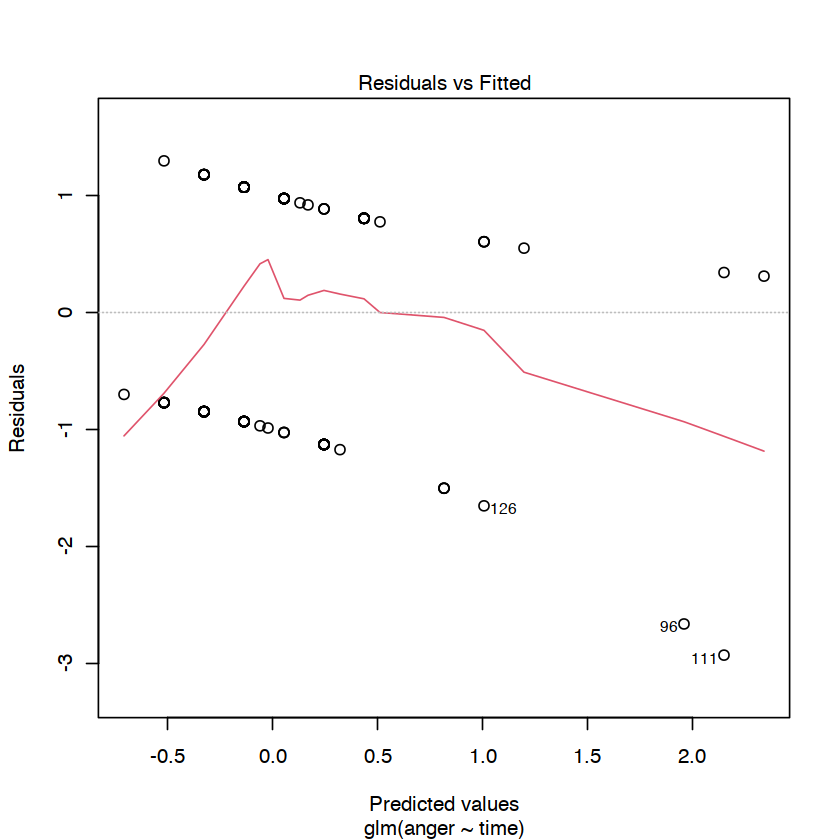

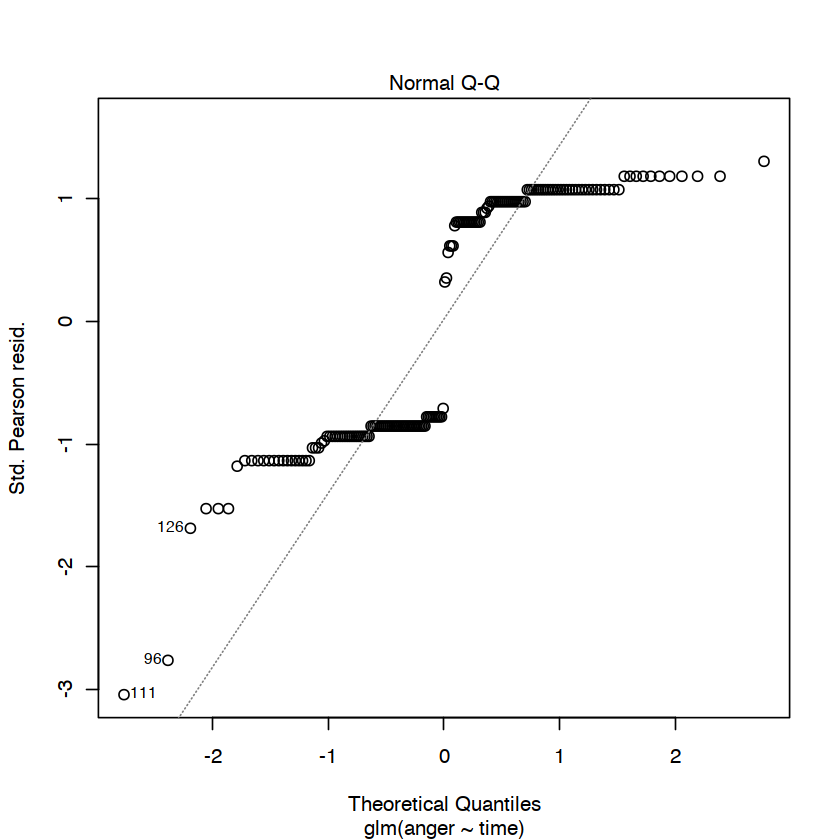

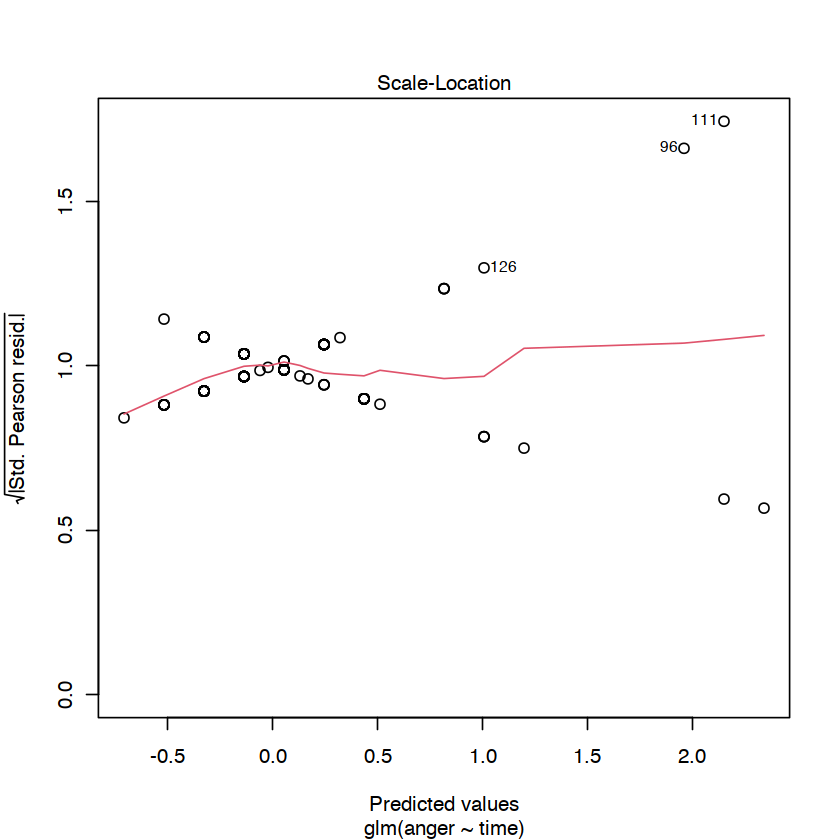

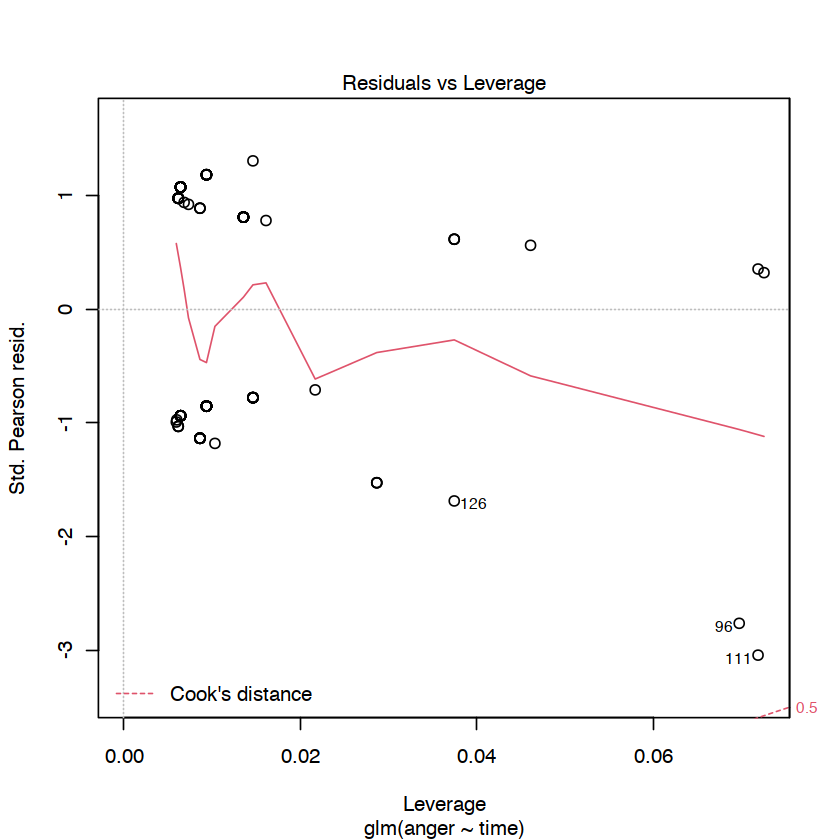

In [74]:
plot(glm.fit2)